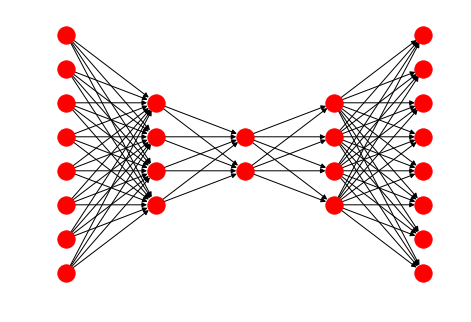

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def create_dense_mask(layer_dims):
    mask = []
    for i in range(len(layer_dimensions[:-1])):     
        mask.append(np.ones((layer_dimensions[i],layer_dimensions[i+1])))
        
    return mask


def create_graph(mask, layer_dims):
    G = nx.DiGraph()
   
    # Add nodes
    i = 0
    for layer_no, dim in enumerate(layer_dims):
        for j in range(dim):
            G.add_node(i)
            i += 1
            
    # Add edges
    for mask_no, layer_mask in enumerate(mask):
        start_index = sum(layer_dims[:mask_no])
        end_index = start_index + layer_dims[mask_no]

        for i, row in enumerate(layer_mask):
            for j, value in enumerate(row):
                # Only add connection if the weight is not 0
                if value != 0:
                    G.add_edge(start_index + i, end_index + j)
                    
    return G

# Define layout of the neural net
def neural_net_layout(G, mask, layer_dims):
    i = 0
    pos = {}
    for layer_no, dim in enumerate(layer_dims):
        for j in range(dim):
            pos[i] = (layer_no, j - (dim/2))
            i += 1
            
    return pos

layer_dimensions = [8, 4, 2, 4, 8]
mask = create_dense_mask(layer_dimensions)
G = create_graph(mask, layer_dimensions)
pos = neural_net_layout(G, mask, layer_dimensions)
nx.draw(G, pos)

In [2]:
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.palettes import Spectral4
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.plotting import figure
from bokeh.io import show, output_file, output_notebook

graph = from_networkx(G, neural_net_layout, mask = mask, layer_dims = layer_dimensions)
graph.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])

plot = figure(x_range=(-0.1,len(layer_dimensions)-0.9),
              y_range=(-max(layer_dimensions)/2 - 0.5,max(layer_dimensions)/2),
              tools="", toolbar_location=None)
plot.title.text = "Graph Interaction Demonstration"
plot.renderers.append(graph)
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None
plot.axis.visible = False

output_notebook()
show(plot)

Loading BokehJS ...

In [3]:
graph = from_networkx(G, neural_net_layout, mask = mask, layer_dims = layer_dimensions)

graph.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.9, line_width=1)
graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = EdgesAndLinkedNodes()

plot = figure(x_range=(-0.1,len(layer_dimensions)-0.9),
              y_range=(-max(layer_dimensions)/2 - 0.5,max(layer_dimensions)/2),
              tools="", toolbar_location=None)

plot.title.text = "Graph Interaction Demonstration"
plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())
plot.renderers.append(graph)
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None
plot.axis.visible = False
output_notebook()
show(plot)

Loading BokehJS ...